# Разработка алгоритма по прогнозированию карьерной траектории сотрудника

## Республика Саха (Якутия). Региональный чемпионат

### 5 октября — 4 ноября 2022

## Условие задачи

На основе метаданных работников разработайте прогнозную модель, которая будет предсказывать, какой тип повышения получит сотрудник в будущем.


### Описание входных значений

    Calls.csv — файл, содержащий данные о звонках
    ● Date: дата звонка;
    ● Calltime: длительность звонка в часах;
    ● NumberOfCalls: количество звонков;
    ● Вид учета времени: будни/выходные;
    ● InOut: входящий или исходящий звонок (ToUser: входящий, FromUser: исходящий);
    ● ID: уникальный номер сотрудника.
    
    ConnectionTime.csv — определение опозданий по данным
    ● dateNum: дата;
    ● maxLogOff: последний выход из сети;
    ● Нормативное время начала раб.дня: время начала рабочего дня согласно должности и часового пояса;
    ● Фактич. время начала раб.дня: фактическое время начала рабочего дня
    ● Время опоздания: длительность опоздания;
    ● Признак опоздания: опоздание или нет;
    ● Вых/Будни: выходной или будний день;
    ● ID: уникальный номер сотрудника.
    
    Education.csv — файл, содержащий данные об образовании сотрудников:
    ● Табельный номер руководителя;
    ● Табельный номер сотрудника;
    ● ID: уникальный номер сотрудника.
    ● Специальность: название специальности.
    
    SKUD.csv — файл, содержащий данные прихода/ухода сотрудников на рабочее место
    ● Дата: дата входа/выхода в офис;
    ● Приход.1: первый вход;
    ● Уход.1: последний выход:
    ● Длительность общая: длительность пребывания в офисе;
    ● Длительность раб.дня без обеда: длительность пребывания в офисе без обеда;
    ● Вых/Будни: выходной или будний день:
    ● ID: уникальный номер сотрудника.
    
    Tasks.csv — файл, содержащий данные о исполнение задач:
    ● Статус по просрочке: без нарушения срока или с нарушением;
    ● Срок плановый: плановая дата завершения;
    ● Просрочено, дней: на сколько дней просрочено завершение задания;
    ● Длительность просрочки: без нарушения срока, более 30 дней, менее 30 дней, менее 7 дней;
    ● Вид документа: виды документа, связанного с заданием (СЗ, договор и т.п.);
    ● Дата старта задания;
    ● Дата завершения задания плановая;
    ● Дата завершения задания фактическая;
    ● Состояние задания:
    - завершено – завершенное задание,
    - на приёмке, на проверке – завершенное, но еще не принятое контролёром задание,
    - делегировано – передано другому сотруднику,
    - все остальные состояния означают, что задание не завершено.
    ● ID: уникальный номер сотрудника.
    
    TimenNetwork.csv — интервалы времени в сети в системе учета рабочего времени сотрудника за компьютером
    ● Вых/Будни: выходной или будний день;
    ● monitorTime: общее время активности пользователя в сети;
    ● startTime: дата старта активности;
    ● ID: уникальный номер сотрудника.
    
    WorkingDay.csv — файл, содержащий интервалы времени активности система учета рабочего времени сотрудника за компьютером
    ● startTime: дата старта активности;
    ● activeTime: активное время (пользователь активно пользуется мышью и клавиатурой);
    ● Вых/Будни: выходной или будний день;
    ● monitorTime: общее время активности пользователя;
    ● ID: уникальный номер сотрудника.
    
    train.csv — файл, содержащий данные сотрудников с типом повышения для тренировки;
    ● "Перевод по должности": 0,
    ● "Перевод по подразделению с сохранением должности": 1,
    ● "Перевод и по подразделению и по должности":2,
    ● "Перевод с сохранением должности и подразделения":3
    
    test.csv — пример файла для отправки, содержит id работников, для которых требуется предсказать тип повышения.


### Метрика
В качестве метрики выступает Recall по столбцу type

## Загрузка библиотек и данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
import time
start_time = time.time()

In [3]:
# df_train = pd.read_csv("/content/train.csv")
# df_test = pd.read_csv("/content/test.csv")
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_calls = pd.read_csv("Calls.csv")
df_connection_time = pd.read_csv("ConnectionTime.csv")
df_ed = pd.read_csv("Education.csv")
df_skud = pd.read_csv("SKUD.csv")
df_tasks = pd.read_csv("Tasks.csv")
df_timen_network = pd.read_csv("TimenNetwork.csv")
df_working_day = pd.read_csv("WorkingDay.csv")

C:\Users\Игорь\AppData\Local\Temp\ipykernel_10572\2987866374.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_connection_time = pd.read_csv("ConnectionTime.csv")
C:\Users\Игорь\AppData\Local\Temp\ipykernel_10572\2987866374.py:10: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tasks = pd.read_csv("Tasks.csv")


## Исследование данных

In [4]:
def eda(df):
    """ функция выводит основные характеристики датафрейма """
    print('\n head()')
    print(df.head(3))
    print('\n info()')
    print(df.info())
    print('\n describe()')
    print(df.describe())
    print('\n nunique()')
    print(df.nunique())

In [5]:
df_list = ['df_calls', 'df_connection_time', 'df_ed', 'df_skud', 'df_tasks', 'df_timen_network', 'df_working_day']
j = 0
for i in [df_calls, df_connection_time, df_ed, df_skud, df_tasks, df_timen_network, df_working_day]:
    print(df_list[j])
    print('---------------------------------------------------------------------------')
    eda(i)
    print('===========================================================================')
    print()
    j +=1

df_calls
---------------------------------------------------------------------------

 head()
                      Date                CallTime  NumberOfCalls  \
0  2021-08-16 00:00:00,000  0,00027777777777777778              1   
1  2021-09-21 00:00:00,000  0,00027777777777777778              1   
2  2021-01-11 00:00:00,000  0,00027777777777777778              1   

  Вид учета времени   InOut          id  
0             Будни  ToUser  ОРГ1-01945  
1             Будни  ToUser  ОРГ1-01945  
2             Будни  ToUser  ОРГ1-01945  

 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407867 entries, 0 to 407866
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date               407867 non-null  object
 1   CallTime           407867 non-null  object
 2   NumberOfCalls      407867 non-null  int64 
 3   Вид учета времени  392655 non-null  object
 4   InOut              407867 non-null  object
 5   i

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536660 entries, 0 to 536659
Data columns (total 11 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Статус по просрочке                  536660 non-null  object
 1   Срок плановый                        15821 non-null   object
 2   Просрочено, дней                     536660 non-null  int64 
 3   ДлительностьПросрочки                536660 non-null  object
 4   ID задачи                            536660 non-null  object
 5   Вид документа                        533143 non-null  object
 6   Дата старта задания                  536660 non-null  object
 7   Дата завершения задания плановая     274057 non-null  object
 8   Дата завершения задания фактическая  520683 non-null  object
 9   Состояние задания                    536660 non-null  object
 10  id                                   536660 non-null  object
dtypes: int64(1), object(10)
me

## df_ed

In [6]:
df_ed.head(3)

,Табельный номер руководителя,id,Вид образования,Специальность
0,NaN,ОРГ1-00131,Высшее образование - бакалавриат,Юриспруденция
1,NaN,ОРГ1-03220,Среднее профессиональное образование,Финансы
2,NaN,ОРГ1-03008,Высшее образование,Юриспруденция


In [7]:
df_ed.describe()

,Табельный номер руководителя,id,Вид образования,Специальность
count,3380,5609,5510,4852
unique,152,4788,16,1082
top,ОРГ2-09100,ОРГ1-02554,Высшее образование,Монтажник технологических трубопроводов
freq,1797,15,1440,338


In [8]:
df_ed["Вид образования"].value_counts()

Высшее образование                                1440
Среднее профессиональное образование              1009
Среднее общее образование                          620
Начальное профессиональное образование             573
Профессиональное обучение                          497
Повышение квалификации                             392
Высшее образование - бакалавриат                   365
Высшее образование - специалитет, магистратура     327
Среднее (полное) общее образование                 111
Основное общее образование                          66
Переподготовка                                      52
Дополнительное профессиональное образование         23
Неполное высшее образование                         21
Аспирантура                                          6
Начальное общее образование                          6
Послевузовское образование                           2
Name: Вид образования, dtype: int64

In [9]:
df_ed["Специальность"].value_counts()

Монтажник технологических трубопроводов                                 338
Изолировщик на термоизоляции                                            163
Маляр                                                                   156
Бетонщик                                                                140
Промышленное и гражданское строительство                                122
                                                                       ... 
повар-кондитер                                                            1
Библиотековедение и библиография                                          1
Техническая эксплуатация авиационного радиоэлектронного оборудования      1
электро- и теплотехника                                                   1
Бомпьютерная графика                                                      1
Name: Специальность, Length: 1082, dtype: int64

In [10]:
df_ed["Табельный номер руководителя"].value_counts()

ОРГ2-09100    1797
ОРГ1-00457      96
ОРГ2-02987      72
ОРГ1-00483      63
ОРГ1-00599      37
              ... 
ОРГ1-00581       1
ОРГ1-02592       1
ОРГ1-00571       1
ОРГ2-00418       1
ОРГ1-02703       1
Name: Табельный номер руководителя, Length: 152, dtype: int64

In [11]:
df_train = pd.merge(df_train, df_ed, on="id", how='left').drop_duplicates(subset="id")
#df_train = df_train.drop(["Табельный номер руководителя", "Специальность"],axis = 1)
df_train = df_train.fillna(0)
df_train.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность
0,ОРГ1-02050,2,0,Неполное высшее образование,Технологические машины и оборудование
2,ОРГ1-02783,2,ОРГ1-01974,Высшее образование,Автоматизация технологических процессов и прои...
3,ОРГ2-06173,0,ОРГ2-01170,Высшее образование,Управление качеством


In [12]:
df_test = pd.merge(df_test, df_ed, on="id", how='left').drop_duplicates(subset="id")
df_test = df_test.fillna(0)
df_test.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность
0,ОРГ1-02649,0,0,0,0
1,ОРГ2-05929,0,ОРГ2-00539,Высшее образование - бакалавриат,Инженерно-геодезическое обеспечение и техничес...
2,ОРГ2-05859,0,ОРГ2-04561,Среднее общее образование,0


## df_connection_time

In [13]:
df_connection_time.head(3)

,dateNum,maxLogOff,Нормативное время начала раб.дня,Фактич. время начала раб.дня,Время опоздания,Признак опоздания,Вых/Будни,id
0,"2021-12-15 00:00:00,000","2021-12-15 17:30:27,246","1899-12-30 08:30:00,000","1899-12-30 08:24:18,606",NaN,NaN,Будни,ОРГ1-02782
1,"2021-12-15 00:00:00,000","2021-12-15 16:30:13,330","1899-12-30 08:30:00,000","1899-12-30 01:05:20,513",NaN,NaN,Будни,ОРГ1-01407
2,"2021-12-15 00:00:00,000","2021-12-15 15:27:37,246","1899-12-30 08:30:00,000","1899-12-30 05:47:33,156",NaN,NaN,Будни,ОРГ1-01909


In [14]:
df_connection_time_res = df_connection_time[["id","Признак опоздания", "Время опоздания"]]
df_connection_time_res = df_connection_time_res[df_connection_time_res["Признак опоздания"].notna()]
df_connection_time_res.head(3)

,id,Признак опоздания,Время опоздания
127561,ОРГ1-01589,Опоздание,"3,8434999999999997"
127562,ОРГ1-01589,Опоздание,"2,2224119444444446"
127563,ОРГ1-01589,Опоздание,"6,2151869444444445"


In [15]:
#Преобразование 'Время опоздания' в число
df_connection_time_res['Время опоздания'] = df_connection_time_res['Время опоздания'].str.replace(',', '.').astype(float)
df_connection_time_res.head(3)

,id,Признак опоздания,Время опоздания
127561,ОРГ1-01589,Опоздание,3.843500
127562,ОРГ1-01589,Опоздание,2.222412
127563,ОРГ1-01589,Опоздание,6.215187


In [16]:
df_connection_time_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77520 entries, 127561 to 230661
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 77520 non-null  object 
 1   Признак опоздания  77520 non-null  object 
 2   Время опоздания    77520 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.4+ MB


In [17]:
df_connection_gr = df_connection_time_res.groupby(["id"]).agg({
  "Признак опоздания": "count",
  "Время опоздания": "sum"
}).reset_index()
df_connection_gr

,id,Признак опоздания,Время опоздания
0,ОРГ1-00004,275,1074.006654
1,ОРГ1-00028,35,120.570977
2,ОРГ1-00030,57,233.216486
3,ОРГ1-00044,33,106.507036
4,ОРГ1-00046,178,865.774642
...,...,...,...
1578,ОРГ2-08177,5,9.013549
1579,ОРГ2-08181,3,16.522187
1580,ОРГ2-08203,7,11.623287
1581,ОРГ2-08204,1,3.669575


In [18]:
df_train = pd.merge(df_train, df_connection_gr , on="id", how='left')
df_train = df_train.rename(columns={'Признак опоздания': 'Количество опозданий'}) 
#df_train = df_train.fillna(0)
df_train[['Количество опозданий', 'Время опоздания']] = df_train[['Количество опозданий', 'Время опоздания']].fillna(0)
df_train[['Количество опозданий', 'Время опоздания']] = df_train[['Количество опозданий', 'Время опоздания']].astype(int)
df_train.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания
0,ОРГ1-02050,2,0,Неполное высшее образование,Технологические машины и оборудование,5,17
1,ОРГ1-02783,2,ОРГ1-01974,Высшее образование,Автоматизация технологических процессов и прои...,7,42
2,ОРГ2-06173,0,ОРГ2-01170,Высшее образование,Управление качеством,22,91


In [19]:
df_test = pd.merge(df_test, df_connection_gr , on="id", how='left')
df_test = df_test.rename(columns={'Признак опоздания': 'Количество опозданий'}) 
#df_test = df_test.fillna(0)
df_test[['Количество опозданий', 'Время опоздания']] = df_test[['Количество опозданий', 'Время опоздания']].fillna(0) 
df_test[['Количество опозданий', 'Время опоздания']] = df_test[['Количество опозданий', 'Время опоздания']].astype(int)
df_test.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания
0,ОРГ1-02649,0,0,0,0,0,0
1,ОРГ2-05929,0,ОРГ2-00539,Высшее образование - бакалавриат,Инженерно-геодезическое обеспечение и техничес...,19,94
2,ОРГ2-05859,0,ОРГ2-04561,Среднее общее образование,0,104,165


In [20]:
df_connection_time_res.head()

,id,Признак опоздания,Время опоздания
127561,ОРГ1-01589,Опоздание,3.843500
127562,ОРГ1-01589,Опоздание,2.222412
127563,ОРГ1-01589,Опоздание,6.215187
127564,ОРГ1-01589,Опоздание,2.013154
127565,ОРГ1-01589,Опоздание,2.024352


## df_calls

In [21]:
eda(df_calls)


 head()
                      Date                CallTime  NumberOfCalls  \
0  2021-08-16 00:00:00,000  0,00027777777777777778              1   
1  2021-09-21 00:00:00,000  0,00027777777777777778              1   
2  2021-01-11 00:00:00,000  0,00027777777777777778              1   

  Вид учета времени   InOut          id  
0             Будни  ToUser  ОРГ1-01945  
1             Будни  ToUser  ОРГ1-01945  
2             Будни  ToUser  ОРГ1-01945  

 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407867 entries, 0 to 407866
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date               407867 non-null  object
 1   CallTime           407867 non-null  object
 2   NumberOfCalls      407867 non-null  int64 
 3   Вид учета времени  392655 non-null  object
 4   InOut              407867 non-null  object
 5   id                 407867 non-null  object
dtypes: int64(1), object(5)
memory usage: 1

In [22]:
df_calls.head(3)

,Date,CallTime,NumberOfCalls,Вид учета времени,InOut,id
0,"2021-08-16 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945
1,"2021-09-21 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945
2,"2021-01-11 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945


In [23]:
df_calls_res = df_calls[["id","CallTime", "NumberOfCalls", "InOut"]]
df_calls_res['CallTime'] = df_calls_res['CallTime'].str.replace(',', '.').astype(float)

C:\Users\Игорь\AppData\Local\Temp\ipykernel_10572\2953350146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calls_res['CallTime'] = df_calls_res['CallTime'].str.replace(',', '.').astype(float)


In [24]:
df_calls_res = pd.get_dummies(df_calls_res, columns=["InOut"])
df_calls_res.head(3)

,id,CallTime,NumberOfCalls,InOut_FromUser,InOut_ToUser
0,ОРГ1-01945,0.000278,1,0,1
1,ОРГ1-01945,0.000278,1,0,1
2,ОРГ1-01945,0.000278,1,0,1


In [25]:
df_calls_gr = df_calls_res.groupby(["id"]).agg({
  "NumberOfCalls": "count",
  "CallTime": "sum",
  "InOut_FromUser": "sum",
  "InOut_ToUser": "sum"
}).reset_index()
df_calls_gr

,id,NumberOfCalls,CallTime,InOut_FromUser,InOut_ToUser
0,ОРГ1-00004,539,162.595278,275.0,264.0
1,ОРГ1-00005,879,272.755556,331.0,548.0
2,ОРГ1-00028,452,59.880000,204.0,248.0
3,ОРГ1-00030,528,62.760833,265.0,263.0
4,ОРГ1-00044,650,153.458333,319.0,331.0
...,...,...,...,...,...
1066,ОРГ2-05629,8,6.128056,8.0,0.0
1067,ОРГ2-05862,4,0.315278,4.0,0.0
1068,ОРГ2-05932,21,5.973611,21.0,0.0
1069,ОРГ2-06006,1,0.220278,1.0,0.0


In [26]:
df_train = pd.merge(df_train, df_calls_gr , on="id", how='left')
df_train[['NumberOfCalls', 'CallTime', 'InOut_FromUser', 'InOut_ToUser']] = df_train[['NumberOfCalls', 'CallTime', 'InOut_FromUser', 'InOut_ToUser']].fillna(0) 
df_train[['NumberOfCalls', 'InOut_FromUser', 'InOut_ToUser']] = df_train[['NumberOfCalls', 'InOut_FromUser', 'InOut_ToUser']].astype(int)
df_train.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания,NumberOfCalls,CallTime,InOut_FromUser,InOut_ToUser
0,ОРГ1-02050,2,0,Неполное высшее образование,Технологические машины и оборудование,5,17,150,26.778333,75,75
1,ОРГ1-02783,2,ОРГ1-01974,Высшее образование,Автоматизация технологических процессов и прои...,7,42,413,49.934722,190,223
2,ОРГ2-06173,0,ОРГ2-01170,Высшее образование,Управление качеством,22,91,0,0.000000,0,0


In [27]:
df_test = pd.merge(df_test, df_calls_gr , on="id", how='left')
df_test[['NumberOfCalls', 'CallTime', 'InOut_FromUser', 'InOut_ToUser']] = df_test[['NumberOfCalls', 'CallTime', 'InOut_FromUser', 'InOut_ToUser']].fillna(0) 
df_test[['NumberOfCalls', 'InOut_FromUser', 'InOut_ToUser']] = df_test[['NumberOfCalls', 'InOut_FromUser', 'InOut_ToUser']].astype(int)
df_test.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания,NumberOfCalls,CallTime,InOut_FromUser,InOut_ToUser
0,ОРГ1-02649,0,0,0,0,0,0,3,0.110278,3,0
1,ОРГ2-05929,0,ОРГ2-00539,Высшее образование - бакалавриат,Инженерно-геодезическое обеспечение и техничес...,19,94,0,0.000000,0,0
2,ОРГ2-05859,0,ОРГ2-04561,Среднее общее образование,0,104,165,0,0.000000,0,0


## df_tasks

In [28]:
eda(df_tasks)


 head()
   Статус по просрочке Срок плановый  Просрочено, дней ДлительностьПросрочки  \
0  Без нарушения срока           NaN                 0   без нарушения срока   
1  Без нарушения срока           NaN                 0   без нарушения срока   
2  Без нарушения срока           NaN                 0   без нарушения срока   

                              ID задачи      Вид документа  \
0  E1DE844D-EE2D-4C41-AEDF-93F246749F0E  Служебная записка   
1  7A92343C-8C9A-46E7-AC81-8F50F95009D0  Служебная записка   
2  5CE64E52-D2D1-4DCC-B2C8-34734AA39AC0  Служебная записка   

       Дата старта задания Дата завершения задания плановая  \
0  2021-12-10 00:00:00,000                              NaN   
1  2021-12-10 00:00:00,000                              NaN   
2  2021-12-10 00:00:00,000                              NaN   

  Дата завершения задания фактическая Состояние задания          id  
0             2021-12-10 00:00:00,000         Завершено  ОРГ1-02588  
1             2021-12-10 00:

In [29]:
df_tasks["Статус по просрочке"].value_counts()

Без нарушения срока    454148
С нарушением срока      82512
Name: Статус по просрочке, dtype: int64

In [30]:
df_tasks_res = df_tasks[["id","Статус по просрочке"]]
df_tasks_res

,id,Статус по просрочке
0,ОРГ1-02588,Без нарушения срока
1,ОРГ1-02588,Без нарушения срока
2,ОРГ1-02588,Без нарушения срока
3,ОРГ1-02588,Без нарушения срока
4,ОРГ1-02588,Без нарушения срока
...,...,...
536655,ОРГ2-02838,Без нарушения срока
536656,ОРГ2-02838,Без нарушения срока
536657,ОРГ2-02838,Без нарушения срока
536658,ОРГ2-02838,Без нарушения срока


In [31]:
df_tasks_res["Статус по просрочке"] = df_tasks_res["Статус по просрочке"].astype('category')
df_tasks_res["Статус по просрочке"] = df_tasks_res["Статус по просрочке"].cat.codes
df_tasks_res.head(3)

C:\Users\Игорь\AppData\Local\Temp\ipykernel_10572\3569576887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tasks_res["Статус по просрочке"] = df_tasks_res["Статус по просрочке"].astype('category')
C:\Users\Игорь\AppData\Local\Temp\ipykernel_10572\3569576887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tasks_res["Статус по просрочке"] = df_tasks_res["Статус по просрочке"].cat.codes


,id,Статус по просрочке
0,ОРГ1-02588,0
1,ОРГ1-02588,0
2,ОРГ1-02588,0


In [32]:
df_tasks_res["Статус по просрочке"].value_counts()

0    454148
1     82512
Name: Статус по просрочке, dtype: int64

In [33]:
df_tasks_gr = df_tasks_res.groupby(["id"]).agg({
  "Статус по просрочке": "sum"
}).reset_index()
df_tasks_gr

,id,Статус по просрочке
0,ОРГ1-00004,119.0
1,ОРГ1-00005,56.0
2,ОРГ1-00028,9.0
3,ОРГ1-00030,5.0
4,ОРГ1-00044,90.0
...,...,...
1267,ОРГ2-06006,46.0
1268,ОРГ2-06061,22.0
1269,ОРГ2-06084,8.0
1270,ОРГ2-06115,1.0


In [34]:
df_train = pd.merge(df_train, df_tasks_gr , on="id", how='left')
df_train[['Статус по просрочке']] = df_train[['Статус по просрочке']].fillna(0) 
df_train.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания,NumberOfCalls,CallTime,InOut_FromUser,InOut_ToUser,Статус по просрочке
0,ОРГ1-02050,2,0,Неполное высшее образование,Технологические машины и оборудование,5,17,150,26.778333,75,75,0.0
1,ОРГ1-02783,2,ОРГ1-01974,Высшее образование,Автоматизация технологических процессов и прои...,7,42,413,49.934722,190,223,50.0
2,ОРГ2-06173,0,ОРГ2-01170,Высшее образование,Управление качеством,22,91,0,0.000000,0,0,0.0


In [35]:
df_test = pd.merge(df_test, df_tasks_gr , on="id", how='left')
df_test['Статус по просрочке'] = df_test['Статус по просрочке'].fillna(0) 
df_test.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания,NumberOfCalls,CallTime,InOut_FromUser,InOut_ToUser,Статус по просрочке
0,ОРГ1-02649,0,0,0,0,0,0,3,0.110278,3,0,0.0
1,ОРГ2-05929,0,ОРГ2-00539,Высшее образование - бакалавриат,Инженерно-геодезическое обеспечение и техничес...,19,94,0,0.000000,0,0,0.0
2,ОРГ2-05859,0,ОРГ2-04561,Среднее общее образование,0,104,165,0,0.000000,0,0,19.0


In [36]:
df_tasks["Срок плановый"].value_counts()

более 30 дней    11292
без срока         4528
до 30 дней           1
Name: Срок плановый, dtype: int64

In [37]:
df_tasks["ДлительностьПросрочки"].value_counts()

без нарушения срока    454148
более 30 дней           34620
до 7 дней               31984
до 30 дней              15908
Name: ДлительностьПросрочки, dtype: int64

In [38]:
df_tasks_res = df_tasks[["id","ДлительностьПросрочки"]]
df_tasks_res = pd.get_dummies(df_tasks_res, columns=["ДлительностьПросрочки"])
df_tasks_res.head(3)

,id,ДлительностьПросрочки_без нарушения срока,ДлительностьПросрочки_более 30 дней,ДлительностьПросрочки_до 30 дней,ДлительностьПросрочки_до 7 дней
0,ОРГ1-02588,1,0,0,0
1,ОРГ1-02588,1,0,0,0
2,ОРГ1-02588,1,0,0,0


In [39]:
df_tasks_gr = df_tasks_res.groupby(["id"]).agg({
  "ДлительностьПросрочки_без нарушения срока": "sum",
  "ДлительностьПросрочки_более 30 дней": "sum",
  "ДлительностьПросрочки_до 30 дней": "sum",
  "ДлительностьПросрочки_до 7 дней": "sum"
}).reset_index()
df_tasks_gr

,id,ДлительностьПросрочки_без нарушения срока,ДлительностьПросрочки_более 30 дней,ДлительностьПросрочки_до 30 дней,ДлительностьПросрочки_до 7 дней
0,ОРГ1-00004,1027.0,31.0,20.0,68.0
1,ОРГ1-00005,2163.0,17.0,12.0,27.0
2,ОРГ1-00028,235.0,0.0,3.0,6.0
3,ОРГ1-00030,31.0,0.0,1.0,4.0
4,ОРГ1-00044,224.0,16.0,23.0,51.0
...,...,...,...,...,...
1267,ОРГ2-06006,349.0,1.0,7.0,38.0
1268,ОРГ2-06061,86.0,0.0,1.0,21.0
1269,ОРГ2-06084,20.0,1.0,3.0,4.0
1270,ОРГ2-06115,5.0,1.0,0.0,0.0


In [40]:
df_train = pd.merge(df_train, df_tasks_gr , on="id", how='left')
#df_train[['Статус по просрочке']] = df_train[['Статус по просрочке']].fillna(0) 
df_train.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания,NumberOfCalls,CallTime,InOut_FromUser,InOut_ToUser,Статус по просрочке,ДлительностьПросрочки_без нарушения срока,ДлительностьПросрочки_более 30 дней,ДлительностьПросрочки_до 30 дней,ДлительностьПросрочки_до 7 дней
0,ОРГ1-02050,2,0,Неполное высшее образование,Технологические машины и оборудование,5,17,150,26.778333,75,75,0.0,1.0,0.0,0.0,0.0
1,ОРГ1-02783,2,ОРГ1-01974,Высшее образование,Автоматизация технологических процессов и прои...,7,42,413,49.934722,190,223,50.0,256.0,7.0,25.0,18.0
2,ОРГ2-06173,0,ОРГ2-01170,Высшее образование,Управление качеством,22,91,0,0.000000,0,0,0.0,NaN,NaN,NaN,NaN


In [41]:
df_test = pd.merge(df_test, df_tasks_gr , on="id", how='left')
#df_train[['Статус по просрочке']] = df_train[['Статус по просрочке']].fillna(0) 
df_test.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания,NumberOfCalls,CallTime,InOut_FromUser,InOut_ToUser,Статус по просрочке,ДлительностьПросрочки_без нарушения срока,ДлительностьПросрочки_более 30 дней,ДлительностьПросрочки_до 30 дней,ДлительностьПросрочки_до 7 дней
0,ОРГ1-02649,0,0,0,0,0,0,3,0.110278,3,0,0.0,NaN,NaN,NaN,NaN
1,ОРГ2-05929,0,ОРГ2-00539,Высшее образование - бакалавриат,Инженерно-геодезическое обеспечение и техничес...,19,94,0,0.000000,0,0,0.0,NaN,NaN,NaN,NaN
2,ОРГ2-05859,0,ОРГ2-04561,Среднее общее образование,0,104,165,0,0.000000,0,0,19.0,1.0,19.0,0.0,0.0


In [42]:
df_tasks.head(3)

,Статус по просрочке,Срок плановый,"Просрочено, дней",ДлительностьПросрочки,ID задачи,Вид документа,Дата старта задания,Дата завершения задания плановая,Дата завершения задания фактическая,Состояние задания,id
0,Без нарушения срока,NaN,0,без нарушения срока,E1DE844D-EE2D-4C41-AEDF-93F246749F0E,Служебная записка,"2021-12-10 00:00:00,000",NaN,"2021-12-10 00:00:00,000",Завершено,ОРГ1-02588
1,Без нарушения срока,NaN,0,без нарушения срока,7A92343C-8C9A-46E7-AC81-8F50F95009D0,Служебная записка,"2021-12-10 00:00:00,000",NaN,"2021-12-10 00:00:00,000",Завершено,ОРГ1-02588
2,Без нарушения срока,NaN,0,без нарушения срока,5CE64E52-D2D1-4DCC-B2C8-34734AA39AC0,Служебная записка,"2021-12-10 00:00:00,000",NaN,"2021-12-10 00:00:00,000",Завершено,ОРГ1-02588


In [43]:
df_tasks_res = df_tasks[["id","Просрочено, дней"]]

In [44]:
df_tasks_gr = df_tasks_res.groupby(["id"]).agg({
  "Просрочено, дней": "sum"
}).reset_index()
df_tasks_gr

,id,"Просрочено, дней"
0,ОРГ1-00004,8857
1,ОРГ1-00005,1481
2,ОРГ1-00028,51
3,ОРГ1-00030,17
4,ОРГ1-00044,1748
...,...,...
1267,ОРГ2-06006,308
1268,ОРГ2-06061,79
1269,ОРГ2-06084,140
1270,ОРГ2-06115,416


In [45]:
df_train = pd.merge(df_train, df_tasks_gr , on="id", how='left')
df_train.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания,NumberOfCalls,CallTime,InOut_FromUser,InOut_ToUser,Статус по просрочке,ДлительностьПросрочки_без нарушения срока,ДлительностьПросрочки_более 30 дней,ДлительностьПросрочки_до 30 дней,ДлительностьПросрочки_до 7 дней,"Просрочено, дней"
0,ОРГ1-02050,2,0,Неполное высшее образование,Технологические машины и оборудование,5,17,150,26.778333,75,75,0.0,1.0,0.0,0.0,0.0,0.0
1,ОРГ1-02783,2,ОРГ1-01974,Высшее образование,Автоматизация технологических процессов и прои...,7,42,413,49.934722,190,223,50.0,256.0,7.0,25.0,18.0,861.0
2,ОРГ2-06173,0,ОРГ2-01170,Высшее образование,Управление качеством,22,91,0,0.000000,0,0,0.0,NaN,NaN,NaN,NaN,NaN


In [46]:
df_test = pd.merge(df_test, df_tasks_gr , on="id", how='left')
df_test.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания,NumberOfCalls,CallTime,InOut_FromUser,InOut_ToUser,Статус по просрочке,ДлительностьПросрочки_без нарушения срока,ДлительностьПросрочки_более 30 дней,ДлительностьПросрочки_до 30 дней,ДлительностьПросрочки_до 7 дней,"Просрочено, дней"
0,ОРГ1-02649,0,0,0,0,0,0,3,0.110278,3,0,0.0,NaN,NaN,NaN,NaN,NaN
1,ОРГ2-05929,0,ОРГ2-00539,Высшее образование - бакалавриат,Инженерно-геодезическое обеспечение и техничес...,19,94,0,0.000000,0,0,0.0,NaN,NaN,NaN,NaN,NaN
2,ОРГ2-05859,0,ОРГ2-04561,Среднее общее образование,0,104,165,0,0.000000,0,0,19.0,1.0,19.0,0.0,0.0,3874.0


In [47]:
df_tasks["Вид документа"].value_counts()

Служебная записка                              219740
Входящий                                        85972
Исходящий                                       76326
Приказ                                          43382
Внутренний документ                             27526
Договор                                         21082
Дополнительное соглашение                       20128
Акт                                             17999
Распоряжение                                     5898
Файл                                             5704
Протокол                                         3519
Исходящий РМЗ                                    2748
Внутренний документ для БП синхронизация 1С      2201
Запрос на внесение изменений                      665
Отчет по ВА                                       253
Name: Вид документа, dtype: int64

In [48]:
df_tasks["Вид документа"].rename
df_tasks = df_tasks.rename(columns={"Вид документа": "doc"})

In [49]:
df_tasks_res = df_tasks[["id","doc"]]
df_tasks_res = pd.get_dummies(df_tasks_res, columns=["doc"])
df_tasks_res.head(3)

,id,doc_Акт,doc_Внутренний документ,doc_Внутренний документ для БП синхронизация 1С,doc_Входящий,doc_Договор,doc_Дополнительное соглашение,doc_Запрос на внесение изменений,doc_Исходящий,doc_Исходящий РМЗ,doc_Отчет по ВА,doc_Приказ,doc_Протокол,doc_Распоряжение,doc_Служебная записка,doc_Файл
0,ОРГ1-02588,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,ОРГ1-02588,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,ОРГ1-02588,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [50]:
df_tasks_gr = df_tasks_res.groupby(["id"]).agg({
    "doc_Служебная записка": "sum",
    "doc_Входящий": "sum",
    "doc_Исходящий": "sum",
    "doc_Приказ": "sum",
    "doc_Внутренний документ": "sum",
    "doc_Договор": "sum",
    "doc_Дополнительное соглашение": "sum",
    "doc_Акт": "sum",
    "doc_Распоряжение": "sum",
    "doc_Файл": "sum",
    "doc_Протокол": "sum",
    "doc_Исходящий РМЗ": "sum",
    "doc_Внутренний документ для БП синхронизация 1С": "sum",
    "doc_Запрос на внесение изменений": "sum",
    "doc_Отчет по ВА": "sum"
}).reset_index()
df_tasks_gr

,id,doc_Служебная записка,doc_Входящий,doc_Исходящий,doc_Приказ,doc_Внутренний документ,doc_Договор,doc_Дополнительное соглашение,doc_Акт,doc_Распоряжение,doc_Файл,doc_Протокол,doc_Исходящий РМЗ,doc_Внутренний документ для БП синхронизация 1С,doc_Запрос на внесение изменений,doc_Отчет по ВА
0,ОРГ1-00004,267.0,135.0,5.0,148.0,182.0,132.0,200.0,5.0,21,10,0,0.0,38.0,0,2
1,ОРГ1-00005,357.0,75.0,98.0,85.0,75.0,436.0,1001.0,1.0,22,5,0,0.0,0.0,63,0
2,ОРГ1-00028,4.0,7.0,0.0,11.0,182.0,0.0,0.0,0.0,2,0,0,0.0,38.0,0,0
3,ОРГ1-00030,4.0,12.0,0.0,6.0,0.0,0.0,0.0,9.0,5,0,0,0.0,0.0,0,0
4,ОРГ1-00044,20.0,80.0,38.0,102.0,3.0,0.0,0.0,0.0,10,13,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,ОРГ2-06006,197.0,58.0,35.0,13.0,1.0,0.0,0.0,0.0,0,74,16,0.0,0.0,0,0
1268,ОРГ2-06061,84.0,19.0,1.0,4.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0
1269,ОРГ2-06084,14.0,2.0,6.0,2.0,0.0,4.0,0.0,0.0,0,0,0,0.0,0.0,0,0
1270,ОРГ2-06115,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0


In [51]:
df_tasks_gr.isna().sum()

id                                                 0
doc_Служебная записка                              0
doc_Входящий                                       0
doc_Исходящий                                      0
doc_Приказ                                         0
doc_Внутренний документ                            0
doc_Договор                                        0
doc_Дополнительное соглашение                      0
doc_Акт                                            0
doc_Распоряжение                                   0
doc_Файл                                           0
doc_Протокол                                       0
doc_Исходящий РМЗ                                  0
doc_Внутренний документ для БП синхронизация 1С    0
doc_Запрос на внесение изменений                   0
doc_Отчет по ВА                                    0
dtype: int64

In [52]:
df_train = pd.merge(df_train, df_tasks_gr , on="id", how='left')
df_train.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания,NumberOfCalls,CallTime,InOut_FromUser,...,doc_Договор,doc_Дополнительное соглашение,doc_Акт,doc_Распоряжение,doc_Файл,doc_Протокол,doc_Исходящий РМЗ,doc_Внутренний документ для БП синхронизация 1С,doc_Запрос на внесение изменений,doc_Отчет по ВА
0,ОРГ1-02050,2,0,Неполное высшее образование,Технологические машины и оборудование,5,17,150,26.778333,75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ОРГ1-02783,2,ОРГ1-01974,Высшее образование,Автоматизация технологических процессов и прои...,7,42,413,49.934722,190,...,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
2,ОРГ2-06173,0,ОРГ2-01170,Высшее образование,Управление качеством,22,91,0,0.000000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df_test = pd.merge(df_test, df_tasks_gr , on="id", how='left')
df_test.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания,NumberOfCalls,CallTime,InOut_FromUser,...,doc_Договор,doc_Дополнительное соглашение,doc_Акт,doc_Распоряжение,doc_Файл,doc_Протокол,doc_Исходящий РМЗ,doc_Внутренний документ для БП синхронизация 1С,doc_Запрос на внесение изменений,doc_Отчет по ВА
0,ОРГ1-02649,0,0,0,0,0,0,3,0.110278,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ОРГ2-05929,0,ОРГ2-00539,Высшее образование - бакалавриат,Инженерно-геодезическое обеспечение и техничес...,19,94,0,0.000000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ОРГ2-05859,0,ОРГ2-04561,Среднее общее образование,0,104,165,0,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df_train = df_train.fillna(0)
df_train.iloc[:, 8:] = df_train.iloc[:, 8:].astype(int)
df_train

,id,type,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания,NumberOfCalls,CallTime,InOut_FromUser,...,doc_Договор,doc_Дополнительное соглашение,doc_Акт,doc_Распоряжение,doc_Файл,doc_Протокол,doc_Исходящий РМЗ,doc_Внутренний документ для БП синхронизация 1С,doc_Запрос на внесение изменений,doc_Отчет по ВА
0,ОРГ1-02050,2,0,Неполное высшее образование,Технологические машины и оборудование,5,17,150,26,75,...,0,0,0,0,0,0,0,0,0,0
1,ОРГ1-02783,2,ОРГ1-01974,Высшее образование,Автоматизация технологических процессов и прои...,7,42,413,49,190,...,0,0,0,2,5,0,0,0,0,0
2,ОРГ2-06173,0,ОРГ2-01170,Высшее образование,Управление качеством,22,91,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ОРГ2-05359,2,ОРГ2-09100,Среднее профессиональное образование,Технолог-сварщик,6,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ОРГ1-00803,2,0,Высшее образование,Журналистика,35,149,3,0,2,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,ОРГ1-02587,2,0,0,0,0,0,0,0,0,...,0,0,0,14,7,0,0,0,0,0
546,ОРГ1-02383,2,0,Высшее образование,"Проектирование, сооружение и эксплуатация газо...",54,375,672,191,327,...,0,0,0,4,1,0,0,0,0,0
547,ОРГ1-02862,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,ОРГ1-00471,2,0,0,Обеспечение экологической безопасности при раб...,12,32,523,138,249,...,0,0,1,6,0,0,0,0,0,0


In [55]:
df_test = df_test.fillna(0)
df_test.iloc[:, 8:] = df_test.iloc[:, 8:].astype(int)
df_test

,id,type,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания,NumberOfCalls,CallTime,InOut_FromUser,...,doc_Договор,doc_Дополнительное соглашение,doc_Акт,doc_Распоряжение,doc_Файл,doc_Протокол,doc_Исходящий РМЗ,doc_Внутренний документ для БП синхронизация 1С,doc_Запрос на внесение изменений,doc_Отчет по ВА
0,ОРГ1-02649,0,0,0,0,0,0,3,0,3,...,0,0,0,0,0,0,0,0,0,0
1,ОРГ2-05929,0,ОРГ2-00539,Высшее образование - бакалавриат,Инженерно-геодезическое обеспечение и техничес...,19,94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ОРГ2-05859,0,ОРГ2-04561,Среднее общее образование,0,104,165,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ОРГ1-00279,0,ОРГ1-00483,Высшее образование,Промышленное и гражданское строительство,15,53,1098,348,328,...,0,0,47,1,27,0,0,0,0,0
4,ОРГ2-01613,0,ОРГ2-02458,"Высшее образование - специалитет, магистратура",Промышленное и гражданское строительство,17,19,0,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,ОРГ1-02893,0,0,Среднее профессиональное образование,Менеджмент,117,642,390,39,161,...,0,0,0,1,0,0,0,0,0,0
258,ОРГ2-01077,0,ОРГ2-09100,"Высшее образование - специалитет, магистратура",Астрономогеодезия,29,73,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,ОРГ1-00469,0,ОРГ1-01974,Высшее образование,Менеджмент организации,2,9,780,127,284,...,0,0,0,2,7,0,0,0,0,0
260,ОРГ1-02060,0,0,Высшее образование,"Проектирование, сооружение и эксплуатация газо...",1,6,337,23,131,...,0,0,0,2,2,0,0,0,0,0


Узнаем размерность наборов

In [56]:
print("df_train", df_train.shape)
print("df_calls", df_calls.shape)
print("df_connection_time", df_connection_time.shape)
print("df_ed", df_ed.shape)
print("df_test", df_test.shape)

df_train (550, 32)
df_calls (407867, 6)
df_connection_time (230662, 8)
df_ed (5609, 4)
df_test (262, 32)


In [57]:
#выделение type
df_train = pd.get_dummies(df_train, columns=["type"])
df_train.head(3)

,id,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания,NumberOfCalls,CallTime,InOut_FromUser,InOut_ToUser,...,doc_Файл,doc_Протокол,doc_Исходящий РМЗ,doc_Внутренний документ для БП синхронизация 1С,doc_Запрос на внесение изменений,doc_Отчет по ВА,type_0,type_1,type_2,type_3
0,ОРГ1-02050,0,Неполное высшее образование,Технологические машины и оборудование,5,17,150,26,75,75,...,0,0,0,0,0,0,0,0,1,0
1,ОРГ1-02783,ОРГ1-01974,Высшее образование,Автоматизация технологических процессов и прои...,7,42,413,49,190,223,...,5,0,0,0,0,0,0,0,1,0
2,ОРГ2-06173,ОРГ2-01170,Высшее образование,Управление качеством,22,91,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 0 to 549
Data columns (total 35 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   id                                               550 non-null    object
 1   Табельный номер руководителя                     550 non-null    object
 2   Вид образования                                  550 non-null    object
 3   Специальность                                    550 non-null    object
 4   Количество опозданий                             550 non-null    int32 
 5   Время опоздания                                  550 non-null    int32 
 6   NumberOfCalls                                    550 non-null    int32 
 7   CallTime                                         550 non-null    int32 
 8   InOut_FromUser                                   550 non-null    int32 
 9   InOut_ToUser                               

In [59]:
# df_num_features = df_train.select_dtypes(include=['float64', 'float32', 'float16', 'int32'])
# #df_num_features.drop('median_house_value', axis=1, inplace=True)
# df_num_features.hist(figsize=(16,16), bins=20, grid=False);

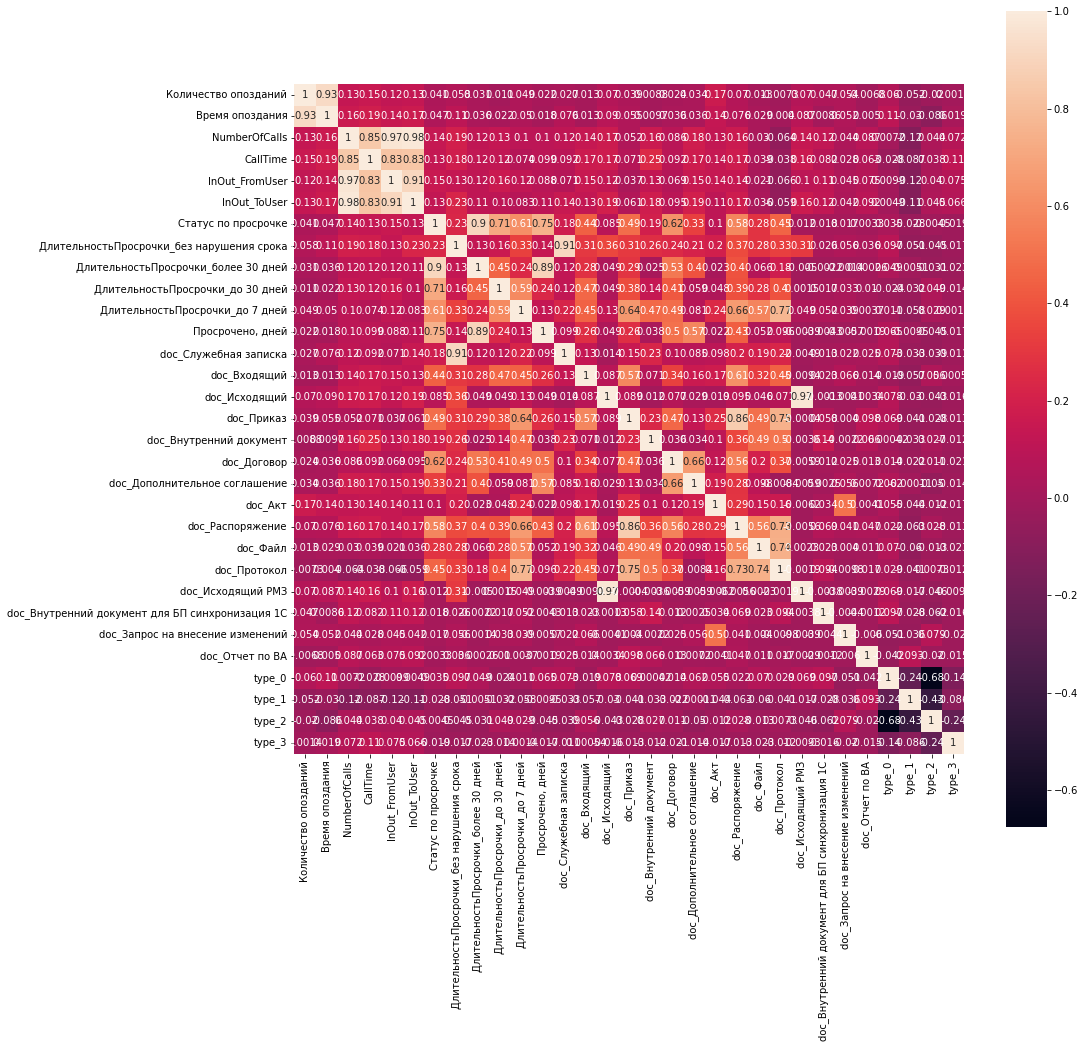

In [60]:
plt.rcParams['figure.figsize']=(15,15)

corr = df_train.corr()
g = sns.heatmap(corr, square = True, annot=True)

In [61]:
corr_fi = df_train.corrwith(df_train['type_0']).abs().sort_values(ascending=False)
corr_fi[:60]

type_0                                             1.000000
type_2                                             0.675085
type_1                                             0.244773
type_3                                             0.135469
Время опоздания                                    0.109028
doc_Внутренний документ для БП синхронизация 1С    0.097111
ДлительностьПросрочки_без нарушения срока          0.096692
doc_Исходящий                                      0.078166
doc_Служебная записка                              0.073358
doc_Файл                                           0.070388
doc_Исходящий РМЗ                                  0.068760
doc_Приказ                                         0.068589
Просрочено, дней                                   0.064901
doc_Дополнительное соглашение                      0.061804
Количество опозданий                               0.060495
doc_Акт                                            0.054524
doc_Запрос на внесение изменений        

In [62]:
corr_fi = df_train.corrwith(df_train['type_1']).abs().sort_values(ascending=False)
corr_fi

type_1                                             1.000000
type_2                                             0.428766
type_0                                             0.244773
NumberOfCalls                                      0.117928
InOut_FromUser                                     0.117517
InOut_ToUser                                       0.113400
doc_Отчет по ВА                                    0.093295
CallTime                                           0.086550
type_3                                             0.086040
doc_Распоряжение                                   0.062722
doc_Файл                                           0.060312
ДлительностьПросрочки_до 7 дней                    0.057548
doc_Входящий                                       0.057344
Количество опозданий                               0.051526
ДлительностьПросрочки_без нарушения срока          0.050627
doc_Акт                                            0.043748
doc_Приказ                              

In [63]:
corr_fi = df_train.corrwith(df_train['type_2']).abs().sort_values(ascending=False)
corr_fi

type_2                                             1.000000
type_0                                             0.675085
type_1                                             0.428766
type_3                                             0.237300
Время опоздания                                    0.085795
doc_Запрос на внесение изменений                   0.078747
doc_Внутренний документ для БП синхронизация 1С    0.061716
doc_Входящий                                       0.055808
doc_Дополнительное соглашение                      0.049821
ДлительностьПросрочки_до 30 дней                   0.049157
doc_Исходящий РМЗ                                  0.046387
InOut_ToUser                                       0.045444
ДлительностьПросрочки_без нарушения срока          0.045271
Просрочено, дней                                   0.044751
NumberOfCalls                                      0.044280
doc_Исходящий                                      0.042924
InOut_FromUser                          

In [64]:
corr_fi = df_train.corrwith(df_train['type_3']).abs().sort_values(ascending=False)
corr_fi

type_3                                             1.000000
type_2                                             0.237300
type_0                                             0.135469
CallTime                                           0.110285
type_1                                             0.086040
InOut_FromUser                                     0.074813
NumberOfCalls                                      0.071732
InOut_ToUser                                       0.066471
ДлительностьПросрочки_более 30 дней                0.023141
doc_Файл                                           0.022696
doc_Договор                                        0.021098
doc_Запрос на внесение изменений                   0.019680
Время опоздания                                    0.019427
Статус по просрочке                                0.019359
doc_Акт                                            0.017488
Просрочено, дней                                   0.017085
ДлительностьПросрочки_без нарушения срок

In [65]:
cat_name = ['Табельный номер руководителя', 'Вид образования', 'Специальность', 'doc_Дополнительное соглашение', 
            'doc_Служебная записка', 'doc_Договор']

## Обучение

In [66]:
#Модель CatBoostClassifier
from catboost import CatBoostRegressor, CatBoostClassifier, Pool, cv
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score

In [67]:
df_train.head(1)

,id,Табельный номер руководителя,Вид образования,Специальность,Количество опозданий,Время опоздания,NumberOfCalls,CallTime,InOut_FromUser,InOut_ToUser,...,doc_Файл,doc_Протокол,doc_Исходящий РМЗ,doc_Внутренний документ для БП синхронизация 1С,doc_Запрос на внесение изменений,doc_Отчет по ВА,type_0,type_1,type_2,type_3
0,ОРГ1-02050,0,Неполное высшее образование,Технологические машины и оборудование,5,17,150,26,75,75,...,0,0,0,0,0,0,0,0,1,0


In [68]:
#drop_list = ["id", "type_0", "type_1", "type_2", "type_3",'Количество опозданий', 'NumberOfCalls', 'InOut_FromUser', 'InOut_ToUser']

In [69]:
#X = df_train.drop(["id", "type_0", "type_1", "type_2", "type_3",'Количество опозданий', 'NumberOfCalls', 'InOut_FromUser', 'InOut_ToUser'], axis = 1)
X = df_train.drop(["id", "type_0", "type_1", "type_2", "type_3"], axis = 1)
y = df_train["type_0"]

In [70]:
ts = 0.3
rs = 42
lr = 0.03
dp = 5

In [71]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=ts, random_state=rs)

In [72]:
test = df_test.drop(["id", "type"], axis = 1)
#test = df_test.drop(["id", "type",'Количество опозданий', 'NumberOfCalls', 'InOut_FromUser', 'InOut_ToUser'], axis = 1)

In [73]:
#Создание объекта данных Pool, плюсы: возможность указать какие признаки являются категориальными
pool_train = Pool(X_train, y_train, cat_features = cat_name)
pool_val = Pool(X_val, cat_features = cat_name)
pool_test = Pool(test, cat_features = cat_name)

In [74]:
#Объявление CatBoostRegressor и обучение
#model = CatBoostRegressor(task_type='GPU')
model = CatBoostClassifier(depth = dp, iterations = 1000, learning_rate = lr)
model.fit(pool_train,verbose=False, plot=False)

In [75]:
#Получение ответов модели на тестовой выборке в локальном тестировании 
y_pred = model.predict(pool_val)
#y_pred

In [76]:
#[None, 'micro', 'macro', 'weighted']
score_list = []
recall_cbc = recall_score(y_val, y_pred, average='macro', zero_division=True)
score_list.append(recall_cbc)
#print("Значение метрики Recall на test: ", recall_cbc) 

In [77]:
#Получение ответов
test_pred = model.predict(pool_test)
df_test_pred = pd.DataFrame(test_pred)
#test_pred

In [78]:
result_pred = pd.read_csv("test.csv")
result_pred['0'] = df_test_pred

### type_1

In [79]:
y = df_train[["type_1"]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=ts, random_state=rs)

In [80]:
pool_train = Pool(X_train, y_train, cat_features = cat_name)
pool_val = Pool(X_val, cat_features = cat_name)
pool_test = Pool(test, cat_features = cat_name)

In [81]:
model = CatBoostClassifier(depth = dp, iterations = 1000, learning_rate = lr)
model.fit(pool_train,verbose=False, plot=False)

In [82]:
y_pred = model.predict(pool_val)
recall_cbc = recall_score(y_val, y_pred, average='macro', zero_division=True)
score_list.append(recall_cbc)

In [83]:
test_pred = model.predict(pool_test)
df_test_pred = pd.DataFrame(test_pred)
result_pred['1'] = df_test_pred

### type_2

In [84]:
y = df_train[["type_2"]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=ts, random_state=rs)

In [85]:
pool_train = Pool(X_train, y_train, cat_features = cat_name)
pool_val = Pool(X_val, cat_features = cat_name)
pool_test = Pool(test, cat_features = cat_name)

In [86]:
model = CatBoostClassifier(depth = 6, iterations = 1000, learning_rate = lr)
model.fit(pool_train,verbose=False, plot=False)

In [87]:
y_pred = model.predict(pool_val)
recall_cbc = recall_score(y_val, y_pred, average='macro', zero_division=True)
score_list.append(recall_cbc)

In [88]:
test_pred = model.predict(pool_test)
df_test_pred = pd.DataFrame(test_pred)
result_pred['2'] = df_test_pred

### type_3

In [89]:
y = df_train[["type_3"]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=ts, random_state=rs)

In [90]:
pool_train = Pool(X_train, y_train, cat_features = cat_name)
pool_val = Pool(X_val, cat_features = cat_name)
pool_test = Pool(test, cat_features = cat_name)

In [91]:
model = CatBoostClassifier(depth = dp, iterations = 1000, learning_rate = lr)
model.fit(pool_train,verbose=False, plot=False)

In [92]:
y_pred = model.predict(pool_val)
recall_cbc = recall_score(y_val, y_pred, average='macro', zero_division=True)
score_list.append(recall_cbc)
score_list

[0.7027777777777777, 0.5821428571428572, 0.6906093612010598, 0.5]

In [93]:
test_pred = model.predict(pool_test)
df_test_pred = pd.DataFrame(test_pred)
result_pred['3'] = df_test_pred
#result_pred

In [94]:
result = result_pred.copy()

In [95]:
for idx,row in result.iterrows():
    if row[5] == 1:
        result['type'][idx] = 3
    elif row[3] == 1:
        result['type'][idx] = 1
    elif row[2] == 1:
        result['type'][idx] = 0
    elif row[4] == 1:
        result['type'][idx] = 2
    else:
        result['type'][idx] = 3
result

C:\Users\Игорь\AppData\Local\Temp\ipykernel_10572\1278127989.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['type'][idx] = 2
C:\Users\Игорь\AppData\Local\Temp\ipykernel_10572\1278127989.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['type'][idx] = 0
C:\Users\Игорь\AppData\Local\Temp\ipykernel_10572\1278127989.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['type'][idx] = 3
C:\Users\Игорь\AppData\Loca

,id,type,0,1,2,3
0,ОРГ1-02649,2,0,0,1,0
1,ОРГ2-05929,0,1,0,0,0
2,ОРГ2-05859,3,0,0,0,0
3,ОРГ1-00279,0,1,0,0,0
4,ОРГ2-01613,0,1,0,0,0
...,...,...,...,...,...,...
257,ОРГ1-02893,3,0,0,0,0
258,ОРГ2-01077,1,0,1,0,0
259,ОРГ1-00469,2,0,0,1,0
260,ОРГ1-02060,2,0,0,1,0


In [96]:
result['type'].value_counts()

2    151
3     53
0     42
1     16
Name: type, dtype: int64

In [97]:
#result['type'] = result['type'].replace(4, 2) 

In [98]:
result = result.drop(["0","1",'2','3'], axis = 1)
result

,id,type
0,ОРГ1-02649,2
1,ОРГ2-05929,0
2,ОРГ2-05859,3
3,ОРГ1-00279,0
4,ОРГ2-01613,0
...,...,...
257,ОРГ1-02893,3
258,ОРГ2-01077,1
259,ОРГ1-00469,2
260,ОРГ1-02060,2


In [100]:
result['type'].value_counts()

2    151
3     53
0     42
1     16
Name: type, dtype: int64

In [101]:
result.to_csv('221030_50 submission_cbc.csv', index=None) 
result.to_csv('submission.csv', index=None)

In [102]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 268.8056728839874 seconds ---
